In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('Data-Melbourne_F_fixed.csv')

In [4]:
df.head()

,Serial Number,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Serial Number             1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   int64  
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   int64  
 13  Total rainfall            1382 non-null   float64
 14  Average 

Here we can see year, month, and day are given in int64 datatype but they need to be in the format of date for better analysis.

In [6]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(columns=['Year', 'Month', 'Day'])

Now let us start with data pro

In [7]:
df.isna().sum()

Serial Number               0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Date                        0
dtype: int64

We can see there are no missing values in our data.

In [8]:
df['Serial Number'].unique()

array([   0,    1,    2, ..., 1379, 1380, 1381], dtype=int64)

We can see the Serial Number is just serving the purpose of an index column, we don't need it in the prediction

In [9]:
df=df.drop(columns=['Serial Number','Date'])

Same is the case with Date as it shouldn't impact the prediction.

In [10]:
df.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed'],
      dtype='object')

In [11]:
df['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64

We may see a very high imbalance in atmospheric pressure values. These values may not interfere much with our result then. 

In [12]:
df=df.drop(columns=['Atmospheric pressure'])

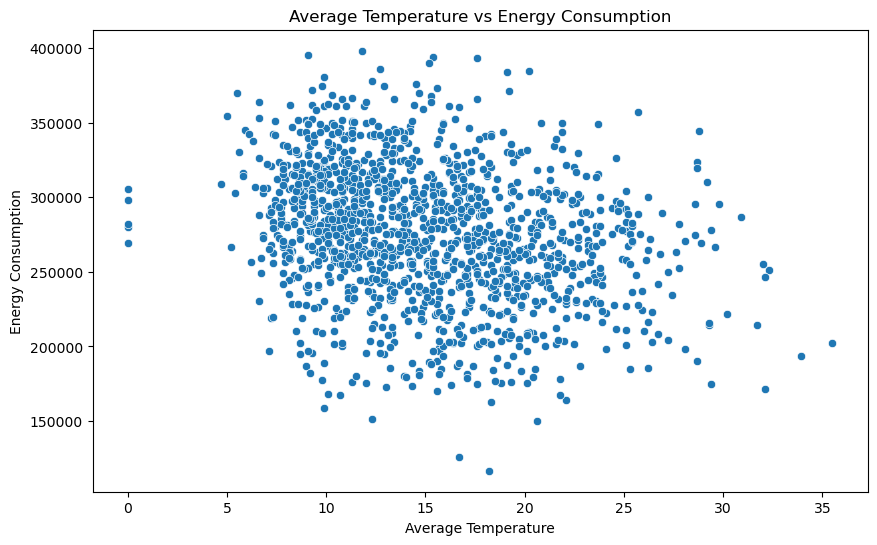

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

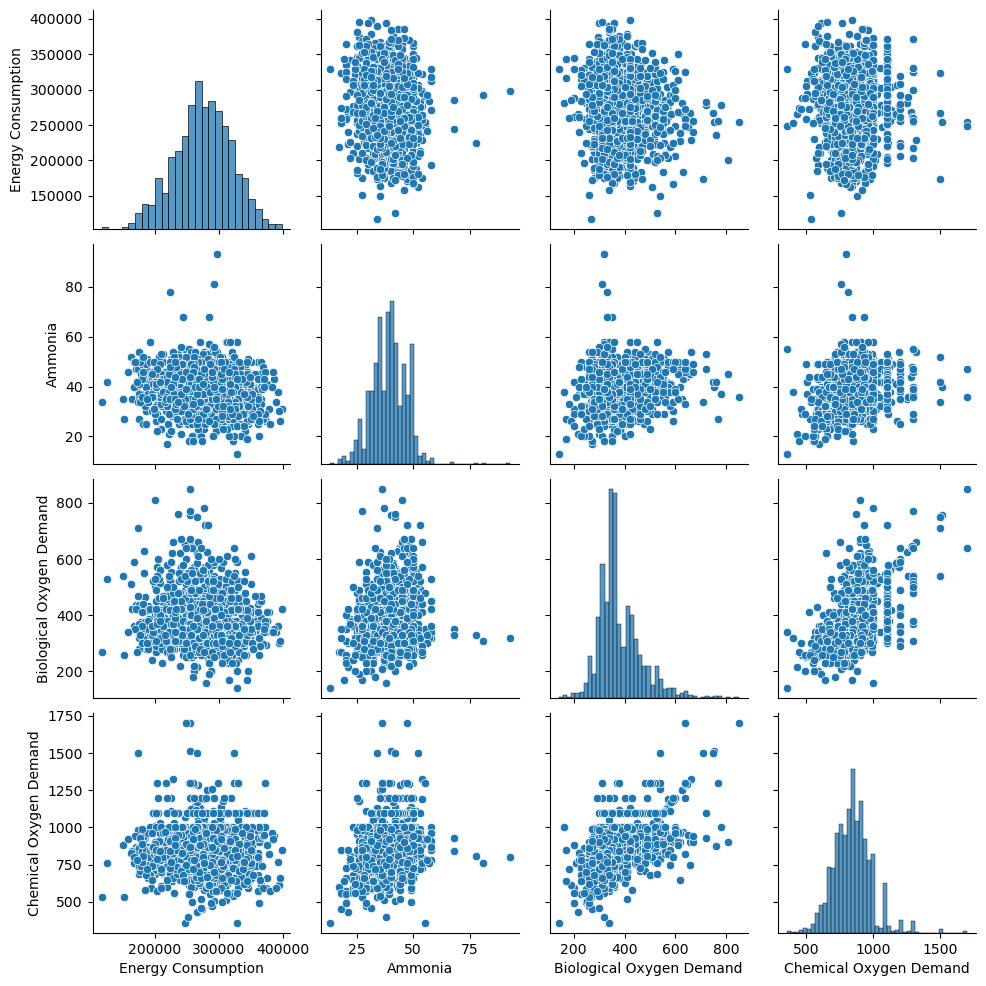

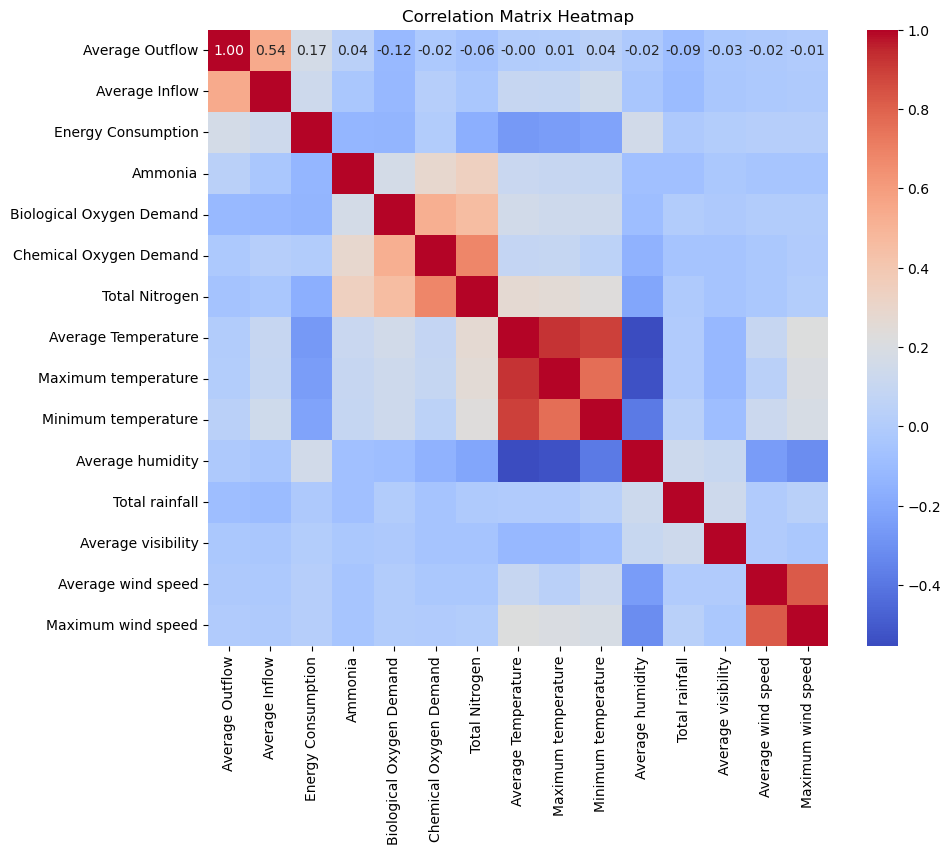

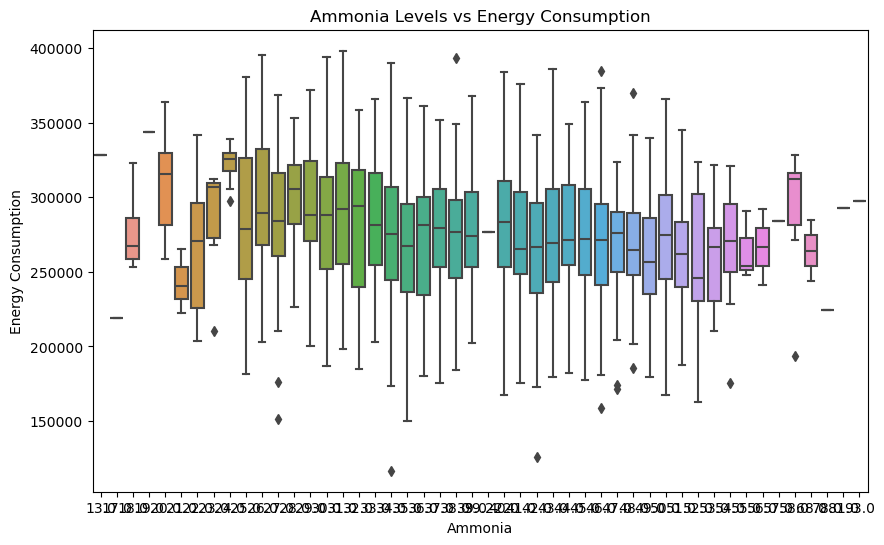

In [14]:
# Scatter plot (for continuous vs continuous)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Average Temperature'], y=df['Energy Consumption'])
plt.title('Average Temperature vs Energy Consumption')
plt.xlabel('Average Temperature')
plt.ylabel('Energy Consumption')
plt.show()

# Pairplot (for multiple continuous variables)
sns.pairplot(df[['Energy Consumption', 'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand']])
plt.show()

# Heatmap (for correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Boxplot (for continuous vs categorical)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ammonia'], y=df['Energy Consumption'])
plt.title('Ammonia Levels vs Energy Consumption')
plt.xlabel('Ammonia')
plt.ylabel('Energy Consumption')
plt.show()


From the data, we can see the Energy Consumption has quite high value, we can convert its unit from Wh to kWh for better predictions

In [15]:
df['Energy Consumption']= np.round(df['Energy Consumption']/1000)

In [16]:
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
0,2.941,2.589,176.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,56,1.52,10.0,26.9,53.5
1,2.936,2.961,182.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,63,0.00,10.0,14.4,27.8
2,2.928,3.225,202.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,47,0.25,10.0,31.9,61.1
3,2.928,3.354,208.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,49,0.00,10.0,27.0,38.9
4,2.917,3.794,203.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,65,0.00,10.0,20.6,35.2


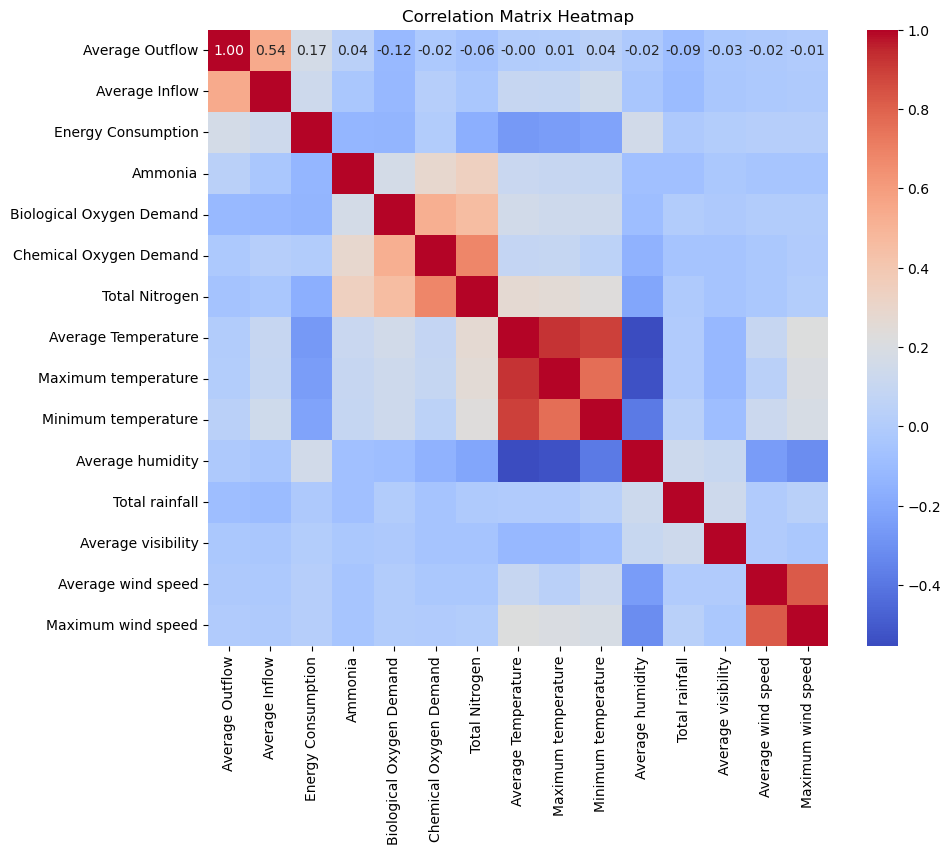

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Seeing the correlation matrix, we can see that the Maximum and Minimum temperatures are highly correlated with the Average Temperature. Therefore, we can remove these two columns.
Similarly, Average wind speed is also highly correlated to Maximum wind speed, thereby we can remove Maximum wind speed.

In [18]:
df=df.drop(columns=['Maximum temperature','Minimum temperature','Maximum wind speed'])

In [19]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Average humidity,Total rainfall,Average visibility,Average wind speed
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.162808,39.222302,382.061708,845.960434,62.740752,15.036686,63.558611,0.218090,9.101592,19.482706
std,1.228778,1.439583,44.646916,7.761598,85.996012,145.416540,3.571035,5.398491,14.534205,1.306923,16.322905,7.136868
min,0.000004,2.589000,117.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.074500,3.643250,246.250000,34.000000,330.000000,751.250000,61.396000,10.800000,55.000000,0.000000,8.400000,14.400000
50%,3.701000,4.161500,276.000000,39.000000,360.000000,845.000000,62.957500,14.300000,66.000000,0.000000,10.000000,18.100000
75%,4.498750,4.847750,306.000000,44.000000,422.980000,920.000000,64.366000,18.575000,74.000000,0.000000,10.000000,23.300000
max,7.920000,18.968000,398.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,97.000000,18.030000,512.000000,49.100000


Using the domain knowledge we can think of BOD, COD, Total Nitrogen and Ammonia as the factors for determining whether the waste water process is optimal or not.
Rather than having BOD and COD as different parameters let us make one single Total oxygen demand for better insights.

In [20]:
df['TOD']=df['Biological Oxygen Demand']+df['Chemical Oxygen Demand']

In [21]:
df.drop(columns=['Biological Oxygen Demand','Chemical Oxygen Demand'], inplace=True)

In [22]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Total Nitrogen,Average Temperature,Average humidity,Total rainfall,Average visibility,Average wind speed,TOD
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.162808,39.222302,62.740752,15.036686,63.558611,0.218090,9.101592,19.482706,1228.022142
std,1.228778,1.439583,44.646916,7.761598,3.571035,5.398491,14.534205,1.306923,16.322905,7.136868,204.087017
min,0.000004,2.589000,117.000000,13.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,3.074500,3.643250,246.250000,34.000000,61.396000,10.800000,55.000000,0.000000,8.400000,14.400000,1100.000000
50%,3.701000,4.161500,276.000000,39.000000,62.957500,14.300000,66.000000,0.000000,10.000000,18.100000,1220.000000
75%,4.498750,4.847750,306.000000,44.000000,64.366000,18.575000,74.000000,0.000000,10.000000,23.300000,1327.500000
max,7.920000,18.968000,398.000000,93.000000,92.000000,35.500000,97.000000,18.030000,512.000000,49.100000,2550.000000


In [23]:
optimal = (
        (df['Ammonia'] < 30) & 
        (df['TOD'] < 1228) & 
        (df['Total Nitrogen'] < 70)
    )
df['Opt'] = np.where(optimal, 1, 0)


Let us scale all the features to ensure that they contribute equally to the model. This is essential for algorithms sensitive to feature magnitudes (e.g., logistic regression, SVMs, KNN).

In [24]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [25]:
X=df.drop(columns=['Opt'])
y=df['Opt']

In [26]:
X_scaled = scale.fit_transform(X)

In [27]:
print("Mean:", X_scaled.mean(axis=0)) 
print("Std Dev:", X_scaled.std(axis=0))

Mean: [ 1.43959454e-16  0.00000000e+00  2.26222000e-16 -1.13111000e-16
 -2.13368477e-15 -8.74039545e-17  2.36504818e-16  0.00000000e+00
 -8.74039545e-17 -1.51671568e-16 -4.11312727e-16]
Std Dev: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Logistic regression from scratch

In [29]:
import numpy as np
import math 

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionMannual():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [30]:
mannual_lr=LogisticRegressionMannual()
mannual_lr.fit(X_train,y_train)
y_pred_lr_mannual=mannual_lr.predict(X_test)

C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykernel_21744\3532774158.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\ADITI\AppData\Local\Temp\ipykern

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
accuracy = accuracy_score(y_test,y_pred_lr_mannual)
f1 = f1_score(y_test,y_pred_lr_mannual, average='binary')  # Use 'weighted' for multiclass
recall = recall_score(y_test,y_pred_lr_mannual,  average='binary')
precision = precision_score(y_test,y_pred_lr_mannual,  average='binary')
cf=confusion_matrix(y_test,y_pred_lr_mannual)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(f"Accuracy for mannual Logistic regression = {accuracy}")
print(f"F1 score for mannual Logistic regression = {f1}")
print(f"Recall for mannual Logistic regression = {recall}")
print(f"Precision for mannual Logistic regression = {precision}")
print(f"Confusion matrix for mannual Logistic regression = {cf}")

Accuracy for mannual Logistic regression = 0.9097472924187726
F1 score for mannual Logistic regression = 0.0
Recall for mannual Logistic regression = 0.0
Precision for mannual Logistic regression = 0.0
Confusion matrix for mannual Logistic regression = [[252   0]
 [ 25   0]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


def evaluate_models(X_train, X_test, y_train, y_test):
    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    }
    
    # Store results
    results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred = model.predict(X_test)
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')  # Use 'weighted' for multiclass
        recall = recall_score(y_test, y_pred, average='binary')
        precision = precision_score(y_test, y_pred, average='binary')
        cf=confusion_matrix(y_test,y_pred)
        # Store results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "F1 Score": f1,
            "Recall": recall,
            "Precision": precision,
            "Confusion Matrix":cf
        })
    
    # Return the results
    return results


In [35]:
print(evaluate_models(X_train, X_test, y_train, y_test))

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[{'Model': 'Logistic Regression', 'Accuracy': 0.9783393501805054, 'F1 Score': 0.8749999999999999, 'Recall': 0.84, 'Precision': 0.9130434782608695, 'Confusion Matrix': array([[250,   2],
       [  4,  21]], dtype=int64)}, {'Model': 'Support Vector Machine', 'Accuracy': 0.9097472924187726, 'F1 Score': 0.0, 'Recall': 0.0, 'Precision': 0.0, 'Confusion Matrix': array([[252,   0],
       [ 25,   0]], dtype=int64)}, {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.927797833935018, 'F1 Score': 0.4117647058823529, 'Recall': 0.28, 'Precision': 0.7777777777777778, 'Confusion Matrix': array([[250,   2],
       [ 18,   7]], dtype=int64)}, {'Model': 'Decision Tree', 'Accuracy': 1.0, 'F1 Score': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'Confusion Matrix': array([[252,   0],
       [  0,  25]], dtype=int64)}, {'Model': 'Random Forest', 'Accuracy': 0.9927797833935018, 'F1 Score': 0.9583333333333334, 'Recall': 0.92, 'Precision': 1.0, 'Confusion Matrix': array([[252,   0],
       [  2,  23]], dtype=int64)}, {

We will do Hyperparameter Tuning on KNN and SVM as the models of Logistic regression, Decision Tree, Random Forest and Adaboost already have high accuracy. 

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the model
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
print("Best parameters:", grid_search_knn.best_params_)

# Evaluate the model on the test set
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9422382671480144


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC()

# Define the hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
print("Best parameters:", grid_search_svm.best_params_)

# Evaluate the model on the test set
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
